In [1653]:
import pandas as pd
import numpy as np
from datetime import datetime

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [1654]:
# Load dataset 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample = pd.read_csv('data/sampleSubmission.csv')
weather = pd.read_csv('data/weather.csv')
spray = pd.read_csv('data/spray.csv')

In [1655]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [1656]:
# An initial check on the class balance of the training dataset.
train.groupby(['WnvPresent'])['NumMosquitos'].sum()

WnvPresent
0    120520
1     14519
Name: NumMosquitos, dtype: int64

In [1657]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [1658]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [1659]:
# Change Date to datetime datatype


# weather['Year'] = pd.DatetimeIndex(weather['Date']).year
# weather['Month'] = pd.DatetimeIndex(weather['Date']).month
# weather['Day'] = pd.DatetimeIndex(weather['Date']).day

weather['Date'] = pd.to_datetime(weather['Date'])

In [1660]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null datetime64[ns]
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(15)
memory usage: 506.1+ KB


In [1661]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [1662]:
# Sort the rows by Date.
weather.sort_values(by=['Date'], axis=0, inplace=True) 

Datatypes are not very consistent with our expectation; let's check what values these columns have by plotting them out - histogram for numerical variables and bar chart for categorical variables.

This could give us some insight on the variance and also on the potential missing values that need to be imputed.

In [1663]:
num_cols = ['Tmax','Tmin','DewPoint','ResultSpeed','ResultDir']
cat_cols = ['Tavg','Depart','WetBulb','Heat','Cool','Sunrise','Sunset',
            'CodeSum','Depth','Water1','SnowFall','PrecipTotal',
            'StnPressure','SeaLevel','AvgSpeed']

Unquote the following block if you want to replot the histograms

In [1664]:
'''
# Check numerical variables
for _ in num_cols:
    weather.hist(column=_)
'''

'\n# Check numerical variables\nfor _ in num_cols:\n    weather.hist(column=_)\n'

Nothing obviously wrong that requires data transformation. We will leave these numerical variables as they are.

Unquote the following block if you want to replot the histograms

In [1665]:
'''
# Check categorical variables
for _ in cat_cols:
    weather[_].value_counts().rename_axis('unique_values').to_frame('counts').plot(kind='bar', title=_, figsize=(15,10))
'''

"\n# Check categorical variables\nfor _ in cat_cols:\n    weather[_].value_counts().rename_axis('unique_values').to_frame('counts').plot(kind='bar', title=_, figsize=(15,10))\n"

Observed different type of issues as follows:

- **'M' or 'T' value that converts the supposingly numerical variable to string:**

    'Tavg','Depart','WetBulb','Heat','Cool','PrecipTotal'(this one is a bit difficult to tell from plot, we did a more detailed check, not included in this notebook),'StnPressure','SeaLevel'
    
`Actions`: impute 'M' with record from previous value; impute 'T' with a very small number that makes sense (i.e. larger than zero but smaller than the smallest record in the current dataset)

- **'-' that converts the supposingly numerical variable to string:**

    'Sunrise','Sunset'
    
`Actions`: impute '-' with record from previous value


- **Half of the records are of the same value:**
    
    'Depart','Sunrise','Sunset'
    
`Actions`: suspect this comes from the discrepancy between the two stations' practice. If true, make the two stations share the same readings.

- **Too little variance:**

    'Depth','Water1','SnowFall'
  
`Actions`: no snow/melted ice during the season when the mosquitos breed. Drop the columns.
    
- **Difficult to interpret:**
    
    'CodeSum'
    
`Actions`: majority (>50%) have no specific weather code. The rest of the observations formed a very long thin tail of numerous possible combinations (97 combinations) of different types of weather. Drop this column since it doesn't make sense to create dummies for all these combinations. (*Another approach is to create a binary variable that simplifes this to a wet/not wet condition - need some research to be done on the weather code. We can come back to this later to assess if it is necessary to improve the model)

In [1666]:
# Split station 1 and 2 to two dataframes, and merge the two tables by key = date
# This way we will be able to have one row per date, easier for us to impute missing values
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, suffixes=('_1', '_2'), on='Date')

### Impute "M"/"T" values present in the continuous variables by FORWARD FILL

In [1667]:
# Replace "T"/"M" values with NaN first, so we could run forward fill (replace NaN with preceding value)
impute_cols = ['Tavg_1','Depart_1','AvgSpeed_1','WetBulb_1','Heat_1','Cool_1','StnPressure_1','SeaLevel_1',
               'Tavg_2','Depart_2','AvgSpeed_2','WetBulb_2','Heat_2','Cool_2','StnPressure_2','SeaLevel_2']
weather[impute_cols] = weather[impute_cols].replace(r'^\s*[T|M]\s*$', np.nan, regex=True).astype(float)

In [1668]:
weather[impute_cols] = weather[impute_cols].fillna(method='ffill')

In [1669]:
# Double check all NaN values have been filled.
weather[impute_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 16 columns):
Tavg_1           1472 non-null float64
Depart_1         1472 non-null float64
AvgSpeed_1       1472 non-null float64
WetBulb_1        1472 non-null float64
Heat_1           1472 non-null float64
Cool_1           1472 non-null float64
StnPressure_1    1472 non-null float64
SeaLevel_1       1472 non-null float64
Tavg_2           1472 non-null float64
Depart_2         0 non-null float64
AvgSpeed_2       1472 non-null float64
WetBulb_2        1472 non-null float64
Heat_2           1472 non-null float64
Cool_2           1472 non-null float64
StnPressure_2    1472 non-null float64
SeaLevel_2       1472 non-null float64
dtypes: float64(16)
memory usage: 195.5 KB


All look alright except Depart_2 column - this is because station 2 had been all "M". This proves our suspect during the initial check on the values. Since there is no meaningful readings, we will drop the column and derive station2 readings from station1.

In [1670]:
weather.drop(['Depart_2'],axis=1,inplace=True)

In [1671]:
# Compute station2 readings of Depart_2 based on Depart_1 readings
weather['Depart_2'] = weather['Tavg_2'] - (weather['Tavg_1'] - weather['Depart_1']) 

### Replace "T" with 0.001 for PrecipTotal
As the value in the PrecipTotal feature is pretty small, we don't impute the values with the preceding value as that would conflict with the actual meaning of "T" as "trace amount". To assign a reasonable value, we will replace it with 0.001.

In [1672]:
weather[['PrecipTotal_1','PrecipTotal_2']] = weather[['PrecipTotal_1','PrecipTotal_2']].replace(r'^\s*[T|M]\s*$', 0.001, regex=True).astype(float)

### Change Sunrise & Sunset to integer, and add DaylightHrs feature

In [1673]:
sun_cols = ['Sunrise_1','Sunset_1','Sunrise_2','Sunset_2']

In [1674]:
weather[sun_cols] = weather[sun_cols].replace('-', np.nan)

In [1675]:
weather[sun_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 4 columns):
Sunrise_1    1472 non-null object
Sunset_1     1472 non-null object
Sunrise_2    0 non-null float64
Sunset_2     0 non-null float64
dtypes: float64(2), object(2)
memory usage: 57.5+ KB


Sunrise_2 and Sunset_2 columns are null, let's drop these two columns and rename Sunrise_1 and Sunset_1 since they are applicable to both stations.

In [1676]:
weather.drop(['Sunrise_2','Sunset_2'],axis=1,inplace=True)

In [1677]:
weather = weather.rename(columns={'Sunrise_1': 'Sunrise', 'Sunset_1': 'Sunset'})

In [1678]:
# Change sunrise/sunset time to float, so that they can be continuous variables
weather['Sunrise'] = weather['Sunrise'].apply(lambda x:round(int(x[:2])+float(x[2:])/60,2))

In [1679]:
weather['Sunset'] = weather['Sunset'].apply(lambda x:round(int(x[:2])+float(x[2:])/60,2))

In [1680]:
weather.head()

,Date,Tmax_1,Tmin_1,Tavg_1,Depart_1,DewPoint_1,WetBulb_1,Heat_1,Cool_1,Sunrise,...,Depth_2,Water1_2,SnowFall_2,PrecipTotal_2,StnPressure_2,SeaLevel_2,ResultSpeed_2,ResultDir_2,AvgSpeed_2,Depart_2
0,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,4.80,...,M,M,M,0.000,29.18,29.82,2.7,25,9.6,15.0
1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,4.78,...,M,M,M,0.000,29.44,30.08,13.3,2,13.4,-2.0
2,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,4.77,...,M,M,M,0.000,29.46,30.12,12.9,6,13.2,4.0
3,2007-05-04,66,49,58.0,4.0,41,50.0,7.0,0.0,4.73,...,M,M,M,0.000,29.36,30.04,10.1,7,10.4,4.0
4,2007-05-05,66,53,60.0,5.0,38,49.0,5.0,0.0,4.72,...,M,M,M,0.001,29.46,30.09,11.2,7,11.5,5.0


In [1681]:
weather['DaylightHrs'] = weather['Sunset'] - weather['Sunrise']

In [1682]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 40 columns):
Date             1472 non-null datetime64[ns]
Tmax_1           1472 non-null int64
Tmin_1           1472 non-null int64
Tavg_1           1472 non-null float64
Depart_1         1472 non-null float64
DewPoint_1       1472 non-null int64
WetBulb_1        1472 non-null float64
Heat_1           1472 non-null float64
Cool_1           1472 non-null float64
Sunrise          1472 non-null float64
Sunset           1472 non-null float64
CodeSum_1        1472 non-null object
Depth_1          1472 non-null object
Water1_1         1472 non-null object
SnowFall_1       1472 non-null object
PrecipTotal_1    1472 non-null float64
StnPressure_1    1472 non-null float64
SeaLevel_1       1472 non-null float64
ResultSpeed_1    1472 non-null float64
ResultDir_1      1472 non-null int64
AvgSpeed_1       1472 non-null float64
Tmax_2           1472 non-null int64
Tmin_2           1472 non-null int64
Tavg_

### Drop columns

After a bit of inspection on the data above and reading through the QUALITY CONTROLLED LOCAL CLIMATOLOGICAL DATA document, we decided to drop the following columns 

In [1683]:
drop_cols = ['CodeSum_1','Depth_1','Water1_1','SnowFall_1','CodeSum_2','Depth_2','Water1_2','SnowFall_2']

In [1684]:
weather.drop(drop_cols,axis=1,inplace=True)

### Change integer cols to float
Not necessary but we do this for consistency of the datatype.

In [1685]:
float_cols = ['Tmax_1','Tmin_1','Tavg_1','Depart_1','DewPoint_1','ResultSpeed_1','ResultDir_1','AvgSpeed_1',
              'Tmax_2','Tmin_2','Tavg_2','DewPoint_2','ResultSpeed_2','ResultDir_2','AvgSpeed_2']

In [1686]:
weather[float_cols] = weather[float_cols].astype(float)

In [1687]:
# Double check datatype has been changed.
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 32 columns):
Date             1472 non-null datetime64[ns]
Tmax_1           1472 non-null float64
Tmin_1           1472 non-null float64
Tavg_1           1472 non-null float64
Depart_1         1472 non-null float64
DewPoint_1       1472 non-null float64
WetBulb_1        1472 non-null float64
Heat_1           1472 non-null float64
Cool_1           1472 non-null float64
Sunrise          1472 non-null float64
Sunset           1472 non-null float64
PrecipTotal_1    1472 non-null float64
StnPressure_1    1472 non-null float64
SeaLevel_1       1472 non-null float64
ResultSpeed_1    1472 non-null float64
ResultDir_1      1472 non-null float64
AvgSpeed_1       1472 non-null float64
Tmax_2           1472 non-null float64
Tmin_2           1472 non-null float64
Tavg_2           1472 non-null float64
DewPoint_2       1472 non-null float64
WetBulb_2        1472 non-null float64
Heat_2           1472 non-nu

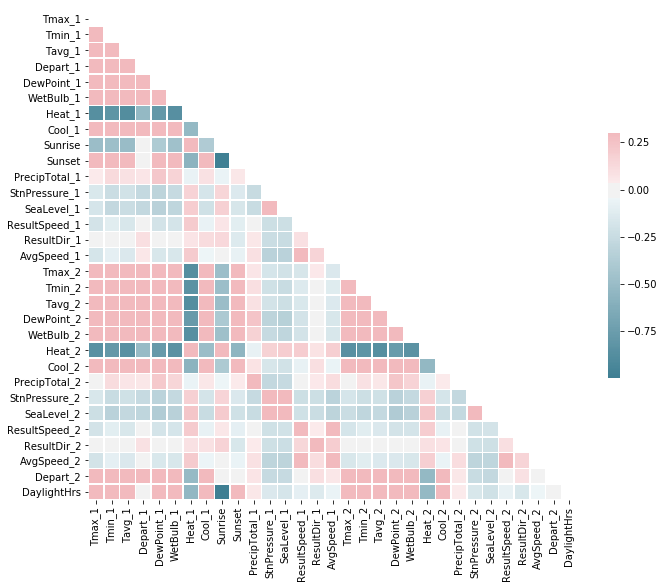

In [1688]:
variables = [x for x in weather.columns if x not in ['Date','Day','Month','Year']]

# Compute the correlation matrix
corr = weather[variables].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### "Heat" variables have very high correlation with all the temperature variables. Sunrise has very strong correlation with DaylightHrs and Sunset.
Drop Heat_1 (records from station1), Heat_2 (records from station2) and Sunrise

In [1689]:
weather.drop(['Heat_1','Heat_2', 'Sunrise'],axis=1,inplace=True)

In [1690]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 29 columns):
Date             1472 non-null datetime64[ns]
Tmax_1           1472 non-null float64
Tmin_1           1472 non-null float64
Tavg_1           1472 non-null float64
Depart_1         1472 non-null float64
DewPoint_1       1472 non-null float64
WetBulb_1        1472 non-null float64
Cool_1           1472 non-null float64
Sunset           1472 non-null float64
PrecipTotal_1    1472 non-null float64
StnPressure_1    1472 non-null float64
SeaLevel_1       1472 non-null float64
ResultSpeed_1    1472 non-null float64
ResultDir_1      1472 non-null float64
AvgSpeed_1       1472 non-null float64
Tmax_2           1472 non-null float64
Tmin_2           1472 non-null float64
Tavg_2           1472 non-null float64
DewPoint_2       1472 non-null float64
WetBulb_2        1472 non-null float64
Cool_2           1472 non-null float64
PrecipTotal_2    1472 non-null float64
StnPressure_2    1472 non-nu

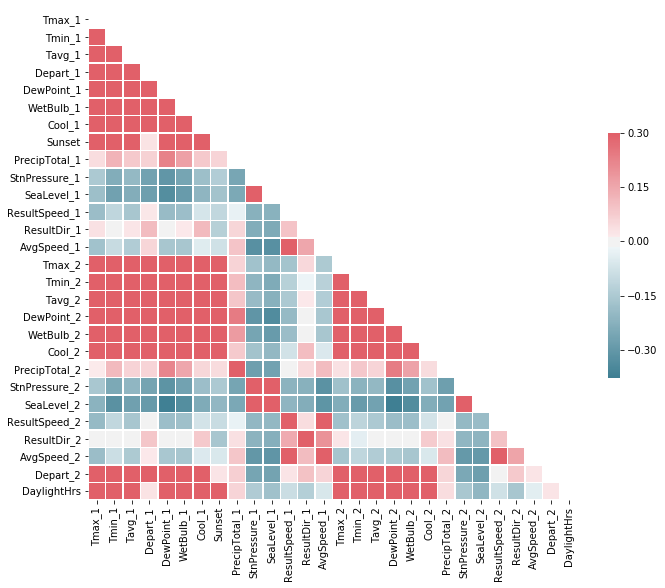

In [1691]:
variables = [x for x in weather.columns if x not in ['Date','Day','Month','Year']]

# Compute the correlation matrix
corr = weather[variables].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [1692]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Data columns (total 29 columns):
Date             1472 non-null datetime64[ns]
Tmax_1           1472 non-null float64
Tmin_1           1472 non-null float64
Tavg_1           1472 non-null float64
Depart_1         1472 non-null float64
DewPoint_1       1472 non-null float64
WetBulb_1        1472 non-null float64
Cool_1           1472 non-null float64
Sunset           1472 non-null float64
PrecipTotal_1    1472 non-null float64
StnPressure_1    1472 non-null float64
SeaLevel_1       1472 non-null float64
ResultSpeed_1    1472 non-null float64
ResultDir_1      1472 non-null float64
AvgSpeed_1       1472 non-null float64
Tmax_2           1472 non-null float64
Tmin_2           1472 non-null float64
Tavg_2           1472 non-null float64
DewPoint_2       1472 non-null float64
WetBulb_2        1472 non-null float64
Cool_2           1472 non-null float64
PrecipTotal_2    1472 non-null float64
StnPressure_2    1472 non-nu

In [1693]:
cols = weather.columns.tolist()

In [1694]:
cols

['Date',
 'Tmax_1',
 'Tmin_1',
 'Tavg_1',
 'Depart_1',
 'DewPoint_1',
 'WetBulb_1',
 'Cool_1',
 'Sunset',
 'PrecipTotal_1',
 'StnPressure_1',
 'SeaLevel_1',
 'ResultSpeed_1',
 'ResultDir_1',
 'AvgSpeed_1',
 'Tmax_2',
 'Tmin_2',
 'Tavg_2',
 'DewPoint_2',
 'WetBulb_2',
 'Cool_2',
 'PrecipTotal_2',
 'StnPressure_2',
 'SeaLevel_2',
 'ResultSpeed_2',
 'ResultDir_2',
 'AvgSpeed_2',
 'Depart_2',
 'DaylightHrs']

### Split dataframes two to dataframes - one each for the two stations, and then append the two tables

This will be easier for our mapping procedure to the training/test dataset

In [1695]:
weather_stn1 = weather[['Date','Sunset','DaylightHrs',
                       'Tmax_1','Tmin_1','Tavg_1','Depart_1','DewPoint_1',
                       'WetBulb_1','Cool_1','PrecipTotal_1','StnPressure_1','SeaLevel_1','ResultSpeed_1',
                       'ResultDir_1','AvgSpeed_1']]

In [1696]:
weather_stn1 = weather_stn1.assign(Station=1)

In [1697]:
weather_stn2 = weather[['Date','Sunset','DaylightHrs',
                       'Tmax_2','Tmin_2','Tavg_2','Depart_2','DewPoint_2',
                       'WetBulb_2','Cool_2','PrecipTotal_2','StnPressure_2','SeaLevel_2','ResultSpeed_2',
                       'ResultDir_2','AvgSpeed_2']]

In [1698]:
weather_stn2 = weather_stn2.assign(Station=2)

In [1699]:
# Rename columns by removing underscore and postfix
weather_stn1.rename(columns = lambda x:x.replace("_1",""), inplace=True)
weather_stn2.rename(columns = lambda x:x.replace("_2",""), inplace=True)

In [1700]:
weather = weather_stn1.append(weather_stn2)

In [1701]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 1471
Data columns (total 17 columns):
Date           2944 non-null datetime64[ns]
Sunset         2944 non-null float64
DaylightHrs    2944 non-null float64
Tmax           2944 non-null float64
Tmin           2944 non-null float64
Tavg           2944 non-null float64
Depart         2944 non-null float64
DewPoint       2944 non-null float64
WetBulb        2944 non-null float64
Cool           2944 non-null float64
PrecipTotal    2944 non-null float64
StnPressure    2944 non-null float64
SeaLevel       2944 non-null float64
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null float64
AvgSpeed       2944 non-null float64
Station        2944 non-null int64
dtypes: datetime64[ns](1), float64(15), int64(1)
memory usage: 414.0 KB


In [1702]:
weather.to_csv('data/weather_cleaned_stack_back.csv')

## Feature Engineering

### Create part of the timestamp in order to create time-bound features

In [1703]:
weather['Year'] = pd.DatetimeIndex(weather['Date']).year

In [1704]:
weather.head()

,Date,Sunset,DaylightHrs,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Station,Year
0,2007-05-01,18.82,14.02,83.0,50.0,67.0,14.0,51.0,56.0,2.0,0.000,29.10,29.82,1.7,27.0,9.2,1,2007
1,2007-05-02,18.83,14.05,59.0,42.0,51.0,-3.0,42.0,47.0,0.0,0.000,29.38,30.09,13.0,4.0,13.4,1,2007
2,2007-05-03,18.85,14.08,66.0,46.0,56.0,2.0,40.0,48.0,0.0,0.000,29.39,30.12,11.7,7.0,11.9,1,2007
3,2007-05-04,18.87,14.14,66.0,49.0,58.0,4.0,41.0,50.0,0.0,0.001,29.31,30.05,10.4,8.0,10.8,1,2007
4,2007-05-05,18.88,14.16,66.0,53.0,60.0,5.0,38.0,49.0,0.0,0.001,29.40,30.10,11.7,7.0,12.0,1,2007


### Create a humidity proxy from Dry Bulb/Dew Point temperature

In [1705]:
weather.head()

,Date,Sunset,DaylightHrs,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Station,Year
0,2007-05-01,18.82,14.02,83.0,50.0,67.0,14.0,51.0,56.0,2.0,0.000,29.10,29.82,1.7,27.0,9.2,1,2007
1,2007-05-02,18.83,14.05,59.0,42.0,51.0,-3.0,42.0,47.0,0.0,0.000,29.38,30.09,13.0,4.0,13.4,1,2007
2,2007-05-03,18.85,14.08,66.0,46.0,56.0,2.0,40.0,48.0,0.0,0.000,29.39,30.12,11.7,7.0,11.9,1,2007
3,2007-05-04,18.87,14.14,66.0,49.0,58.0,4.0,41.0,50.0,0.0,0.001,29.31,30.05,10.4,8.0,10.8,1,2007
4,2007-05-05,18.88,14.16,66.0,53.0,60.0,5.0,38.0,49.0,0.0,0.001,29.40,30.10,11.7,7.0,12.0,1,2007


*Excerpt from: https://sciencing.com/relative-humidity-7611453.html*

*Apply formulas to find relative humidity. Convert Fahrenheit to Celsius by using the formula Tc=5.0/9.0x(Tf-32.0) or (4) Tdc=5.0/9.0x(Tdf-32.0). Tc stands for Celsius temperature. Tf represents Fahrenheit. Tdc is Celcius dew point. Tdf means Fahrenheit dew point. Once this is completed, calculate actual and saturated vapor pressure with the formula 6.11x10.0x(7.5xTc/(237.7+Tc)) for actual vapor pressure and 6.11x10.0x(7.5xTdc/(237.7+Tdc)) for saturated vapor pressure.*

*Divide actual vapor pressure by saturation vapor pressure and multiply by 100 to obtain a percentage using the formula Relative Humidity (percentage) = actual vapor pressure/saturated vapor pressure x100. The resulting number indicates relative humidity.*

In [1706]:
humidity = pd.DataFrame()
humidity['Tc'] = weather['Tavg'].apply(lambda x:5/9*(x-32))
humidity['Tdc'] = weather['DewPoint'].apply(lambda x:5/9*(x-32))
humidity['Pav'] = 6.11*10.0*(7.5*humidity['Tdc']/(237.7+humidity['Tdc']))
humidity['Psv'] = 6.11*10.0*(7.5*humidity['Tc']/(237.7+humidity['Tc']))

In [1707]:
weather['RH'] = humidity['Pav'] / humidity['Psv'] * 100

In [1708]:
weather.head()

,Date,Sunset,DaylightHrs,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Station,Year,RH
0,2007-05-01,18.82,14.02,83.0,50.0,67.0,14.0,51.0,56.0,2.0,0.000,29.10,29.82,1.7,27.0,9.2,1,2007,56.229436
1,2007-05-02,18.83,14.05,59.0,42.0,51.0,-3.0,42.0,47.0,0.0,0.000,29.38,30.09,13.0,4.0,13.4,1,2007,53.713396
2,2007-05-03,18.85,14.08,66.0,46.0,56.0,2.0,40.0,48.0,0.0,0.000,29.39,30.12,11.7,7.0,11.9,1,2007,34.556968
3,2007-05-04,18.87,14.14,66.0,49.0,58.0,4.0,41.0,50.0,0.0,0.001,29.31,30.05,10.4,8.0,10.8,1,2007,35.962410
4,2007-05-05,18.88,14.16,66.0,53.0,60.0,5.0,38.0,49.0,0.0,0.001,29.40,30.10,11.7,7.0,12.0,1,2007,22.515163


In [1709]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 1471
Data columns (total 19 columns):
Date           2944 non-null datetime64[ns]
Sunset         2944 non-null float64
DaylightHrs    2944 non-null float64
Tmax           2944 non-null float64
Tmin           2944 non-null float64
Tavg           2944 non-null float64
Depart         2944 non-null float64
DewPoint       2944 non-null float64
WetBulb        2944 non-null float64
Cool           2944 non-null float64
PrecipTotal    2944 non-null float64
StnPressure    2944 non-null float64
SeaLevel       2944 non-null float64
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null float64
AvgSpeed       2944 non-null float64
Station        2944 non-null int64
Year           2944 non-null int64
RH             2944 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(2)
memory usage: 460.0 KB


### Add back the CodeSum variable and simplify it to Wet/Not Wet condition

In [1710]:
#### See another version of the notebook, as the codes should be way up in the EDA part. 
#### I paste the code here just for reference

In [1711]:
# weather['CodeSum_1'] = weather['CodeSum_1'].str.contains('RA|DZ|BR|FG|UP|SH')

In [1712]:
# weather['CodeSum_2'] = weather['CodeSum_2'].str.contains('RA|DZ|BR|FG|UP|SH')

In [1713]:
# weather = weather.rename(columns={'CodeSum_1': 'WetWeather_1', 'CodeSum_2': 'WetWeather_2'})

### Add a Cumulative Cooling Degree Days feature, based on [this research paper](https://parasitesandvectors.biomedcentral.com/track/pdf/10.1186/1756-3305-3-19)

In [1714]:
weather.groupby(['Station','Year'])['Date'].count()

Station  Year
1        2007    184
         2008    184
         2009    184
         2010    184
         2011    184
         2012    184
         2013    184
         2014    184
2        2007    184
         2008    184
         2009    184
         2010    184
         2011    184
         2012    184
         2013    184
         2014    184
Name: Date, dtype: int64

In [1715]:
weather['CoolYearlyCum']=weather.groupby(['Station','Year'])['Cool'].cumsum()

In [1716]:
weather.reset_index(drop=True,inplace=True)

In [1717]:
weather.head()

,Date,Sunset,DaylightHrs,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Station,Year,RH,CoolYearlyCum
0,2007-05-01,18.82,14.02,83.0,50.0,67.0,14.0,51.0,56.0,2.0,0.000,29.10,29.82,1.7,27.0,9.2,1,2007,56.229436,2.0
1,2007-05-02,18.83,14.05,59.0,42.0,51.0,-3.0,42.0,47.0,0.0,0.000,29.38,30.09,13.0,4.0,13.4,1,2007,53.713396,2.0
2,2007-05-03,18.85,14.08,66.0,46.0,56.0,2.0,40.0,48.0,0.0,0.000,29.39,30.12,11.7,7.0,11.9,1,2007,34.556968,2.0
3,2007-05-04,18.87,14.14,66.0,49.0,58.0,4.0,41.0,50.0,0.0,0.001,29.31,30.05,10.4,8.0,10.8,1,2007,35.962410,2.0
4,2007-05-05,18.88,14.16,66.0,53.0,60.0,5.0,38.0,49.0,0.0,0.001,29.40,30.10,11.7,7.0,12.0,1,2007,22.515163,2.0


In [1718]:
weather.groupby(['Station','Year'])['CoolYearlyCum'].max()

Station  Year
1        2007    1102.0
         2008     828.0
         2009     587.0
         2010    1158.0
         2011    1031.0
         2012    1281.0
         2013     925.0
         2014     798.0
2        2007    1234.0
         2008     959.0
         2009     720.0
         2010    1236.0
         2011    1204.0
         2012    1417.0
         2013    1107.0
         2014    1065.0
Name: CoolYearlyCum, dtype: float64

### Create another set of features that represent the 7-day rolling average

In [1719]:
weather.columns

Index(['Date', 'Sunset', 'DaylightHrs', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Station', 'Year', 'RH',
       'CoolYearlyCum'],
      dtype='object')

In [1720]:
weather.head()

,Date,Sunset,DaylightHrs,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Station,Year,RH,CoolYearlyCum
0,2007-05-01,18.82,14.02,83.0,50.0,67.0,14.0,51.0,56.0,2.0,0.000,29.10,29.82,1.7,27.0,9.2,1,2007,56.229436,2.0
1,2007-05-02,18.83,14.05,59.0,42.0,51.0,-3.0,42.0,47.0,0.0,0.000,29.38,30.09,13.0,4.0,13.4,1,2007,53.713396,2.0
2,2007-05-03,18.85,14.08,66.0,46.0,56.0,2.0,40.0,48.0,0.0,0.000,29.39,30.12,11.7,7.0,11.9,1,2007,34.556968,2.0
3,2007-05-04,18.87,14.14,66.0,49.0,58.0,4.0,41.0,50.0,0.0,0.001,29.31,30.05,10.4,8.0,10.8,1,2007,35.962410,2.0
4,2007-05-05,18.88,14.16,66.0,53.0,60.0,5.0,38.0,49.0,0.0,0.001,29.40,30.10,11.7,7.0,12.0,1,2007,22.515163,2.0


In [1721]:
agg_cols = ['Sunset', 'DaylightHrs', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Cool', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed']

df = pd.DataFrame()
#df['Date'] = weather['Date'] #there has been issue with merging on index, forcing join on key = date,station

In [1722]:
for col in agg_cols:
    col_name = col + "7dAvg"
    df[col_name] = weather.groupby(['Station','Year'])[col].rolling(7,min_periods=1).mean()

In [1723]:
df = df.reset_index(drop=True)
df.head()

,Sunset7dAvg,DaylightHrs7dAvg,Tmax7dAvg,Tmin7dAvg,Tavg7dAvg,Depart7dAvg,DewPoint7dAvg,WetBulb7dAvg,Cool7dAvg,PrecipTotal7dAvg,StnPressure7dAvg,SeaLevel7dAvg,ResultSpeed7dAvg,ResultDir7dAvg,AvgSpeed7dAvg
0,18.820000,14.0200,83.000000,50.00,67.0,14.000000,51.000000,56.000000,2.000000,0.00000,29.100,29.820,1.70,27.000000,9.200
1,18.825000,14.0350,71.000000,46.00,59.0,5.500000,46.500000,51.500000,1.000000,0.00000,29.240,29.955,7.35,15.500000,11.300
2,18.833333,14.0500,69.333333,46.00,58.0,4.333333,44.333333,50.333333,0.666667,0.00000,29.290,30.010,8.80,12.666667,11.500
3,18.842500,14.0725,68.500000,46.75,58.0,4.250000,43.500000,50.250000,0.500000,0.00025,29.295,30.020,9.20,11.500000,11.325
4,18.850000,14.0900,68.000000,48.00,58.4,4.400000,42.400000,50.000000,0.400000,0.00040,29.316,30.036,9.70,10.600000,11.460


In [1724]:
weather = weather.join(df)

In [1725]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 35 columns):
Date                2944 non-null datetime64[ns]
Sunset              2944 non-null float64
DaylightHrs         2944 non-null float64
Tmax                2944 non-null float64
Tmin                2944 non-null float64
Tavg                2944 non-null float64
Depart              2944 non-null float64
DewPoint            2944 non-null float64
WetBulb             2944 non-null float64
Cool                2944 non-null float64
PrecipTotal         2944 non-null float64
StnPressure         2944 non-null float64
SeaLevel            2944 non-null float64
ResultSpeed         2944 non-null float64
ResultDir           2944 non-null float64
AvgSpeed            2944 non-null float64
Station             2944 non-null int64
Year                2944 non-null int64
RH                  2944 non-null float64
CoolYearlyCum       2944 non-null float64
Sunset7dAvg         2944 non-null float64
Daylight

In [1726]:
weather.drop(['Year'],axis=1,inplace=True)

In [1727]:
weather.to_csv('data/weather_cleaned_stack_back_v1.csv')

In [1728]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
Date                2944 non-null datetime64[ns]
Sunset              2944 non-null float64
DaylightHrs         2944 non-null float64
Tmax                2944 non-null float64
Tmin                2944 non-null float64
Tavg                2944 non-null float64
Depart              2944 non-null float64
DewPoint            2944 non-null float64
WetBulb             2944 non-null float64
Cool                2944 non-null float64
PrecipTotal         2944 non-null float64
StnPressure         2944 non-null float64
SeaLevel            2944 non-null float64
ResultSpeed         2944 non-null float64
ResultDir           2944 non-null float64
AvgSpeed            2944 non-null float64
Station             2944 non-null int64
RH                  2944 non-null float64
CoolYearlyCum       2944 non-null float64
Sunset7dAvg         2944 non-null float64
DaylightHrs7dAvg    2944 non-null float64
Tmax7d